In [1]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in the dataframes
df_activities = pd.read_csv("data/activities.csv")
df_users = pd.read_csv("data/users.csv")

In [3]:
df_activities

,UserId,Date,Revenue
0,1326865,2017-02-19,17.05
1,1326865,2017-02-28,17.05
2,1326865,2017-03-06,17.16
3,1326865,2017-03-07,17.16
4,1326865,2017-03-08,17.16
...,...,...,...
22637,3347222,2017-05-15,57.81
22638,3347251,2017-04-03,30.00
22639,3347333,2017-01-27,30.00
22640,3347367,2017-04-04,17.05


In [4]:
df_users

,UserId,Country,DOB,Gender,RegDate
0,1326865,DE,1988-05-04,M,2016-03-24
1,1333278,GB,1971-07-21,M,2016-02-09
2,1336967,GB,1983-07-31,M,2016-01-29
3,1339784,Other,1976-09-21,M,2016-01-21
4,1339829,Other,1981-05-03,F,2016-04-12
...,...,...,...,...,...
5802,3347222,FR,1967-05-25,,2017-03-22
5803,3347251,GB,1981-06-11,F,2017-04-03
5804,3347333,GB,1987-11-22,,2017-01-27
5805,3347367,US,1995-08-09,F,2017-04-04


# Question A

In [5]:
print('activities: {} variables and {} observations'.format(df_activities.shape[1], df_activities.shape[0]) )
print('users: {} variables and {} observations'.format(df_users.shape[1], df_users.shape[0]) )

activities: 3 variables and 22642 observations
users: 5 variables and 5807 observations


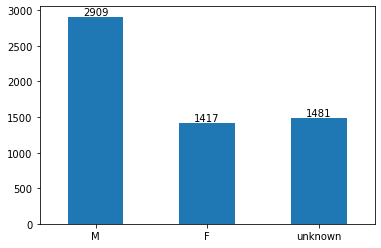

In [6]:
gender_counts = df_users.Gender.value_counts()
gender_counts['unknown'] = gender_counts.pop(' ') #rename the key to unknown

ax = gender_counts.plot(kind='bar', rot=0)
ax.bar_label(ax.containers[0])
plt.show()

In [7]:
# If there is no gender information available, please assume that the gender is male (“M”) for all further questions.
df_users.Gender.replace({" ": "M"}, inplace=True)
df_users.Gender.value_counts()

M    4390
F    1417
Name: Gender, dtype: int64

## 3.Merge the two datasets

In [8]:
df_result = pd.merge(df_activities,
                 df_users,
                 on='UserId')
df_result.head(30)

,UserId,Date,Revenue,Country,DOB,Gender,RegDate
0,1326865,2017-02-19,17.05,DE,1988-05-04,M,2016-03-24
1,1326865,2017-02-28,17.05,DE,1988-05-04,M,2016-03-24
2,1326865,2017-03-06,17.16,DE,1988-05-04,M,2016-03-24
3,1326865,2017-03-07,17.16,DE,1988-05-04,M,2016-03-24
4,1326865,2017-03-08,17.16,DE,1988-05-04,M,2016-03-24
5,1326865,2017-03-21,17.16,DE,1988-05-04,M,2016-03-24
6,1326865,2017-03-29,17.16,DE,1988-05-04,M,2016-03-24
7,1326865,2017-03-30,21.45,DE,1988-05-04,M,2016-03-24
8,1326865,2017-04-04,17.09,DE,1988-05-04,M,2016-03-24
9,1326865,2017-04-05,17.09,DE,1988-05-04,M,2016-03-24


### 3.1 Calculate the days since registration for each activity. 

In [9]:
df_result['DaysSinceReg'] = pd.to_datetime(df_result['Date']) - pd.to_datetime(df_result['RegDate'])

In [10]:
df_result.head(10)

,UserId,Date,Revenue,Country,DOB,Gender,RegDate,DaysSinceReg
0,1326865,2017-02-19,17.05,DE,1988-05-04,M,2016-03-24,332 days
1,1326865,2017-02-28,17.05,DE,1988-05-04,M,2016-03-24,341 days
2,1326865,2017-03-06,17.16,DE,1988-05-04,M,2016-03-24,347 days
3,1326865,2017-03-07,17.16,DE,1988-05-04,M,2016-03-24,348 days
4,1326865,2017-03-08,17.16,DE,1988-05-04,M,2016-03-24,349 days
5,1326865,2017-03-21,17.16,DE,1988-05-04,M,2016-03-24,362 days
6,1326865,2017-03-29,17.16,DE,1988-05-04,M,2016-03-24,370 days
7,1326865,2017-03-30,21.45,DE,1988-05-04,M,2016-03-24,371 days
8,1326865,2017-04-04,17.09,DE,1988-05-04,M,2016-03-24,376 days
9,1326865,2017-04-05,17.09,DE,1988-05-04,M,2016-03-24,377 days


### 3.2 What is the total mean and median revenue generated per user (ie across all activities) ?

#### I Interpret the question as "what is the mean and median of the total revenue produced by each user (over all users' activities)"?

In [11]:
df_users['TotalRevenue'] = 0

In [12]:
for user_id, df_group in df_result.groupby('UserId'):
    
    cuser_total_revenue = df_group.Revenue.sum()
    
    df_users.loc[df_users.UserId == user_id, 'TotalRevenue'] = cuser_total_revenue
    

In [13]:
print('Mean: {}, Median: {}'.format(df_users.TotalRevenue.mean() , df_users.TotalRevenue.median() ))

Mean: 511.80773032546665, Median: 80.0


### 3.3 We can see a big difference between the mean and median due to the fact that there are some people who:
* a. are just operating much longer then others (some are just registered but without operations)
* b. are doing activities that produce higher revenue then a 'typical person'

### Therefore, in this case its more meaningfull to use median as a measure of revenue over all activities over all users

In [14]:
df_users.TotalRevenue.sort_values(ascending=False)

2500    104917.00
2291    101460.33
5256     82190.12
3432     61920.00
2994     57700.00
          ...    
2068         0.00
2070         0.00
2228         0.00
2902         0.00
478          0.00
Name: TotalRevenue, Length: 5807, dtype: float64

### 4. Please visualise the distribution of the revenues by user.
#### Note that I used the Log scale here due to the fact that there are at an order of magnitude more users whoose total revenue is in 0-5000 range then others

Text(0, 0.5, 'Number of users')

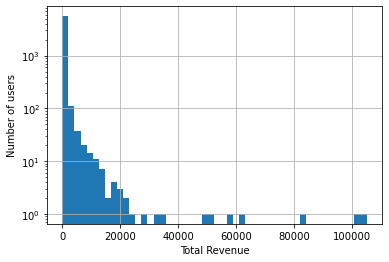

In [15]:
ax = df_users.TotalRevenue.hist(bins=50, log=True)
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Number of users')

### What is the average week 1 revenue, ie the revenue generated by the user in their first week (ie within the first 7 days since registration)?


In [16]:
df_first_week_activities = df_result[df_result.DaysSinceReg < pd.Timedelta(7, "d")]

df_users['TotalRevenueW1'] = 0

for user_id, df_group in df_first_week_activities.groupby('UserId'):
    
    cuser_w1_sum = df_group.Revenue.sum()
    
    df_users.loc[df_users.UserId == user_id, 'TotalRevenueW1'] = cuser_w1_sum
    

In [17]:
print('Average revenue generated by the user in their first week: ', df_users.TotalRevenueW1.mean())

Average revenue generated by the user in their first week:  166.05660926468082


# Question B

In [18]:
from scipy import stats as st

### 1. Is the difference in average revenue between men and women, during week 1, statistically significant?

#### The revenue values for male are independant from revenue values for female, since they dont affect each other, since they are different subjects


In [19]:
df_w1_m = df_users[df_users.Gender == 'M']
df_w1_f = df_users[df_users.Gender == 'F']

In [20]:
#Male population week 1 
df_w1_m.TotalRevenueW1.describe()

count     4390.000000
mean       174.261141
std        595.844443
min          0.000000
25%         20.000000
50%         42.630000
75%        115.082500
max      19350.000000
Name: TotalRevenueW1, dtype: float64

In [21]:
#Female population week 1 
df_w1_f.TotalRevenueW1.describe()

count     1417.000000
mean       140.638193
std        524.230355
min          0.000000
25%         17.820000
50%         34.110000
75%        100.000000
max      10200.000000
Name: TotalRevenueW1, dtype: float64

In [22]:
print('Male population variance: ', df_w1_m.TotalRevenueW1.var())

print('Female population variance: ', df_w1_f.TotalRevenueW1.var())

Male population variance:  355030.5998027392
Female population variance:  274817.46497724304


#### Pooled T-test assumptions:
* The populations are independent -> yes
* The population variances are equal -> no
* Each population is either normal or the sample size is large -> pop size is large, yes

#### Welchs T-test assumptions:
* The populations are independent -> yes
* The population variances are unequal -> yes
* the two samples are of different size -> yes
* Each population is either normal or the sample size is large -> pop size is large, yes

#### We can see (from the data) that the variances arent close enough to each other -> we cant use the pooled t-test, means we need to use the Welch t-test

In [23]:
# note use equal_var = False to perform Welch's t-test, 
# which assumes unequal pop. variances 
# by default, equal_var = True = Pooled t-test

st.ttest_ind(a=df_w1_m.TotalRevenueW1.values, b=df_w1_f.TotalRevenueW1.values, equal_var=False )

Ttest_indResult(statistic=2.028219651424127, pvalue=0.042636111615299316)


#### When the P-value is less than 0.05, then we can conclude that the two means are significantly different.
#### it is less than 0.05 => therefore, the difference between the means is indeed significant

### 2. In which country is this difference the biggest ?
#### I.e in which country the difference of means between male and female is the greatest (for week 1) ?

In [24]:
country_averages = {}

for country_code, df_group in df_w1_m.groupby('Country'):
    
    if not country_code in country_averages:
        country_averages[country_code] = {}

    country_averages[country_code]['M'] = df_group.TotalRevenueW1.mean()

for country_code, df_group in df_w1_f.groupby('Country'):
    
    if not country_code in country_averages:
        country_averages[country_code] = {}

    country_averages[country_code]['F'] = df_group.TotalRevenueW1.mean()

In [25]:
largest_difference_country = 0
result_country = ''

for county in country_averages:
    cdiff = abs( country_averages[county]['M'] - country_averages[county]['F'] )
    
    if cdiff > largest_difference_country:
        largest_difference_country = cdiff
        result_country = county
        

In [26]:
print('Answer: ', result_country)

Answer:  US


### 3. Visualise the relationship between country, gender and week 1 revenue with an appropriate chart.

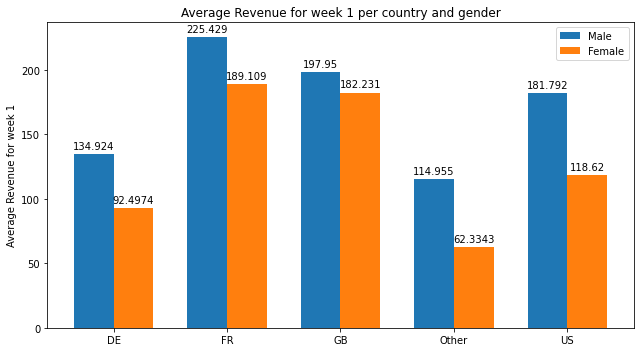

In [27]:
labels = list( country_averages.keys() )

male_means, female_means = [], []

for c in country_averages.keys():
    male_means.append( country_averages[c]['M'] )
    female_means.append( country_averages[c]['F']  )

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(9,5))
rects1 = ax.bar(x - width/2, male_means, width, label='Male')
rects2 = ax.bar(x + width/2, female_means, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Revenue for week 1')
ax.set_title('Average Revenue for week 1 per country and gender')

ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

### 4. Build a linear regression model to predict the week 1 revenue of a user based on the following variables: 
* Gender 
* Age
* Country
* day 1 revenue (ie the revenue generated by the user on their registration date). 

In [28]:
# prepare the data with needed columns -> add day 1 revenue for each user

In [29]:
#create the day-0 revenue column
df_users['Day1Revenue'] = 0

for index, row in df_result[df_result.DaysSinceReg == pd.Timedelta(0, "d") ].iterrows():
    
    df_users.loc[df_users.UserId == row['UserId'], 'Day1Revenue'] = row['Revenue']
    

In [30]:
#calculate age

df_users['today'] = pd.Timestamp('13-04-2022')
df_users['DOB'] = pd.to_datetime(df_result['DOB'])

df_users['Age'] = np.floor( (df_users['today'] - df_users['DOB']).dt.days/365 )

In [31]:
df_data = df_users[['Gender', 'Age', 'Country', 'Day1Revenue', 'TotalRevenueW1']]

### Preprocess and remove outliers

[]

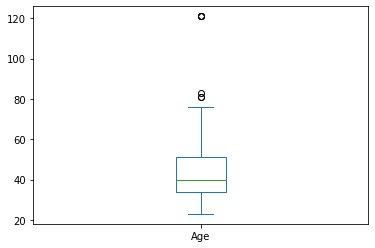

In [32]:
df_data.Age.plot.box()
plt.plot()

In [33]:
#remove outliers by age (unrealistic)
df_data = df_data[df_data.Age <= 75 ]

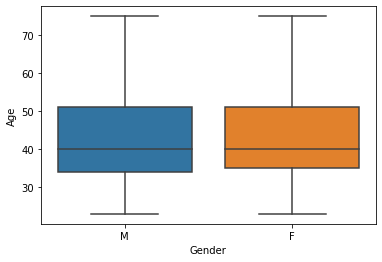

In [34]:
sns.boxplot(y='Age',x='Gender',data=df_data)
plt.show()

### remove outliers by z-score < 3

In [35]:
df_data = df_data[(np.abs(st.zscore(df_data['Day1Revenue'])) < 3)]
df_data = df_data[(np.abs(st.zscore(df_data['TotalRevenueW1'])) < 3)]

<AxesSubplot:xlabel='Gender', ylabel='TotalRevenueW1'>

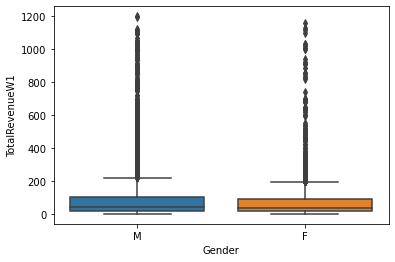

In [36]:
sns.boxplot(y='TotalRevenueW1',x='Gender',data=df_data)

### Which of these variables have a statistically significant predictive power according to this model? => Day1Revenue

In [38]:
df_data.corr()

,Age,Day1Revenue,TotalRevenueW1
Age,1.000000,-0.015369,-0.006006
Day1Revenue,-0.015369,1.000000,0.789057
TotalRevenueW1,-0.006006,0.789057,1.000000


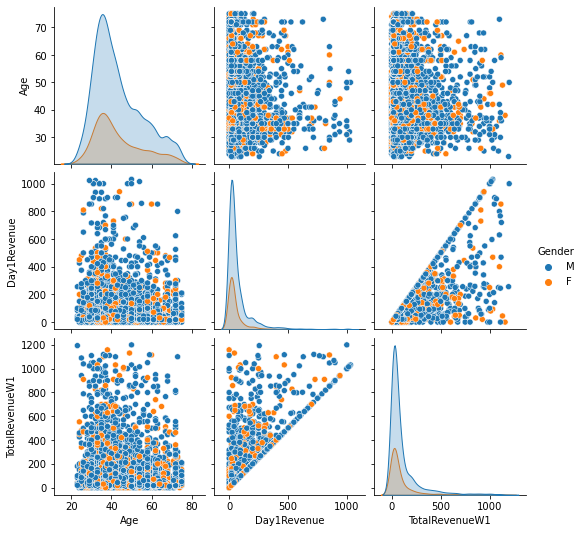

In [37]:
sns.pairplot(df_data, hue='Gender')

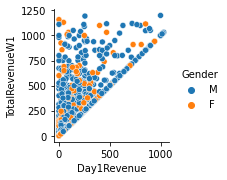

In [39]:
sns.pairplot(df_data, x_vars=['Day1Revenue'],y_vars=['TotalRevenueW1'],hue='Gender')

In [40]:
#add categorical variables as dummy variables
X = df_data [[ 'Gender', 'Age', 'Country', 'Day1Revenue' ]]

X = pd.get_dummies(data=X, drop_first=True)
X

,Age,Day1Revenue,Gender_M,Country_FR,Country_GB,Country_Other,Country_US
0,33.0,0.00,1,0,0,0,0
1,33.0,0.00,1,0,1,0,0
2,33.0,0.00,1,0,1,0,0
3,33.0,0.00,1,0,0,1,0
4,33.0,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...
5802,29.0,37.52,1,1,0,0,0
5803,36.0,30.00,0,0,1,0,0
5804,33.0,30.00,1,0,1,0,0
5805,43.0,17.05,0,0,0,0,1


In [41]:
Y = df_data['TotalRevenueW1']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [43]:

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])

In [45]:
coeff_parameter

,Coefficient
Age,0.070829
Day1Revenue,1.131426
Gender_M,-1.421097
Country_FR,19.249466
Country_GB,15.242988
Country_Other,1.872161
Country_US,8.536257


In [46]:
predictions = model.predict(X_test)
predictions

array([ 89.89642617,  52.21341252,  56.58764672, ..., 262.15912442,
       143.78541721,  51.50060555])

C:\Users\Kostya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalRevenueW1'>

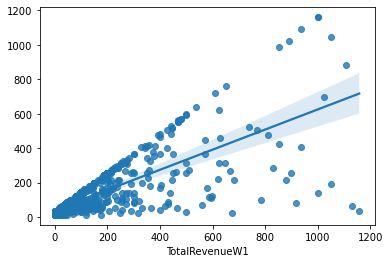

In [47]:
sns.regplot(y_test,predictions)

### What revenues do you expect women from France, Germany and the UK to generate, assuming they are all aged 40 and all generated £20 on their registration day?

In [48]:
#perform predictions on this data
d = {'Gender':['M', 'F','F','F','F','F'], 'Country': ['FR', 'FR', 'DE', 'GB', 'Other', 'US'], 'Age': [40, 40, 40, 40, 40, 40], 'Day1Revenue':[20, 20,20,20, 20, 20] }


df_female_test = pd.DataFrame(data=d)

In [49]:
df_female_test

,Gender,Country,Age,Day1Revenue
0,M,FR,40,20
1,F,FR,40,20
2,F,DE,40,20
3,F,GB,40,20
4,F,Other,40,20
5,F,US,40,20


In [50]:
X_female_test = pd.get_dummies(data=df_female_test, drop_first=True)
predictions = model.predict(X_female_test)

## Answer:

In [51]:
predictions[1:4]

array([56.43237763, 37.18291141, 52.42589944])